<a href="https://colab.research.google.com/github/tarhi/Apple-statistique-et-analyse/blob/main/Tableau_de_bord_commercial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

introduction:

la société alpha spécialisé dans le dommaine de la commercialisation des bouteille de gaz,  demande un traitement, une analyse et une recommandation sur la base base donnée "vente" pour l'année 2013.


In [ ]:
# importer les package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
vente = pd.read_excel('/content/vente.xlsx')
vente.head()

,Date,Centres d'Activite,Produits,Clients,Qte Vendue,prix,taxe
0,2013-01-31,CTR 1,produit 30kg,clt 1,16.665,10,0.2
1,2013-01-31,CTR 1,produit 30kg,clt 2,9.582,10,0.2
2,2013-01-31,CTR 1,produit 30kg,clt 3,31.248,10,0.2
3,2013-01-31,CTR 1,produit 30kg,clt 4,1.800,10,0.2
4,2013-01-31,CTR 1,produit 30kg,clt 5,158.648,10,0.2


nous commencons par une lecture préliminaire de notre data.


In [ ]:
# vente.describe()

In [ ]:
vente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5624 non-null   datetime64[ns]
 1   Centres d'Activite  5596 non-null   object        
 2   Produits            5624 non-null   object        
 3   Clients             5624 non-null   object        
 4   Qte Vendue          5624 non-null   float64       
 5   prix                5624 non-null   int64         
 6   taxe                5624 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 307.7+ KB


In [ ]:
vente.shape

(5624, 7)

In [ ]:
vente.columns

Index(['Date ', 'Centres d'Activite', 'Produits', 'Clients', 'Qte Vendue',
       'prix', 'taxe'],
      dtype='object')

apres nous avons nettoyer notre data on traitant les points suivantes:
* modifier la dénomination des colonnes
*gérer les valeurs manquantes


In [ ]:
# modifier la dénomination des colonnes

vente = vente.rename({"Centres d'Activite":"Centres_Activite"},axis = 1)
vente = vente.rename({"Qte Vendue":"Qte_Vendue"}, axis = 1)

In [ ]:
vente.columns

Index(['Date ', 'Centres_Activite', 'Produits', 'Clients', 'Qte_Vendue',
       'prix', 'taxe'],
      dtype='object')

In [ ]:
# gerer les valeurs manquante
vente.isnull().sum()

Date                 0
Centres_Activite    28
Produits             0
Clients              0
Qte_Vendue           0
prix                 0
taxe                 0
dtype: int64

In [ ]:
# nous constatons que le centre d'activité contient 28 valeurs manquante

NAN = vente[vente['Centres_Activite'].isnull()]
NAN

,Date,Centres_Activite,Produits,Clients,Qte_Vendue,prix,taxe
299,2013-01-31,NaN,produit brut,clt 2,1359.94,7,0.2
300,2013-01-31,NaN,produit brut,clt 15,3455.36,7,0.2
446,2013-01-31,NaN,produit brut,clt 16,863.10,7,0.2
763,2013-02-28,NaN,produit brut,clt 2,713.20,7,0.2
764,2013-02-28,NaN,produit brut,clt 15,3725.88,7,0.2
907,2013-02-28,NaN,produit brut,clt 16,520.26,7,0.2
1235,2013-03-31,NaN,produit brut,clt 2,398.62,7,0.2
1236,2013-03-31,NaN,produit brut,clt 15,3644.18,7,0.2
1388,2013-03-31,NaN,produit brut,clt 16,120.00,7,0.2
1389,2013-03-31,NaN,produit brut,clt 19,400.40,7,0.2


les veleurs manquantes? apres verification avec le clients il nous informer que s'agitent ils des produit brut vendu par un nouveau centre que nous lui donne le code C_nv

nous avons modifier les valeurs manquantes par son nouveau code

In [ ]:
vente.fillna("C_nv", inplace=True)

In [ ]:
vente.isnull().sum()

Date                0
Centres_Activite    0
Produits            0
Clients             0
Qte_Vendue          0
prix                0
taxe                0
dtype: int64

nous ajouterons deux nouvelles colonne : mois et année, mais avant nous devons s'assuer du format date et de la transformer sous format Datetime

In [ ]:
vente["année"] = vente['Date '].dt.year
vente["mois"] = vente['Date '].dt.strftime("%B")

In [ ]:
vente.tail()

,Date,Centres_Activite,Produits,Clients,Qte_Vendue,prix,taxe,année,mois
5619,2013-12-31,CTR 12,produit 120kg,clt 13,0.636,42,0.2,2013,December
5620,2013-12-31,CTR 12,produit 120kg,clt 11,4.476,42,0.2,2013,December
5621,2013-12-31,CTR 12,produit 120kg,clt 5,25.272,42,0.2,2013,December
5622,2013-12-31,CTR 12,produit 120kg,clt 6,0.504,42,0.2,2013,December
5623,2013-12-31,CTR 12,produit 120kg,clt 7,7.536,42,0.2,2013,December


maintenant nous voulons calculer KPi
* chiffre d'affaire hors taxe
* top des clients
* le produit le plus vendu
* centre d'activité le plus productif
* chiffre d'affaire par mois

In [ ]:
vente['chiffre_affaire_HT'] = vente['Qte_Vendue'] * vente['prix']
vente['montant_taxe'] = vente['chiffre_affaire_HT'] * vente['taxe']
vente['chiffre_affaire_TTC'] = vente['chiffre_affaire_HT'] - vente['montant_taxe']

In [ ]:
vente_ = vente.sort_values('chiffre_affaire_TTC').groupby('Produits').sum().sort_index()
vente_.head()

,Qte_Vendue,prix,taxe,année,chiffre_affaire_HT,montant_taxe,chiffre_affaire_TTC
Produits,,,,,,,
produit 120kg,491199.456,85554,407.4,4100481,2.063038e+07,4.126075e+06,1.650430e+07
produit 30kg,104093.036,17560,351.2,3534828,1.040930e+06,2.081861e+05,8.327443e+05
produit 340kg,3763.274,203520,127.2,1280309,1.204248e+06,2.408495e+05,9.633981e+05
produit 60kg,21731.636,17505,233.4,2349171,3.259745e+05,6.519491e+04,2.607796e+05
produit brut,49912.480,196,5.6,56364,3.493874e+05,6.987747e+04,2.795099e+05


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

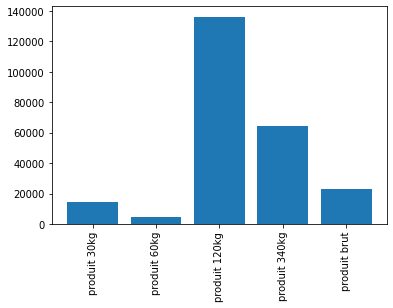

In [ ]:
plt.bar(vente["Produits"], vente["chiffre_affaire_TTC"])
plt.xticks(rotation= "vertical")

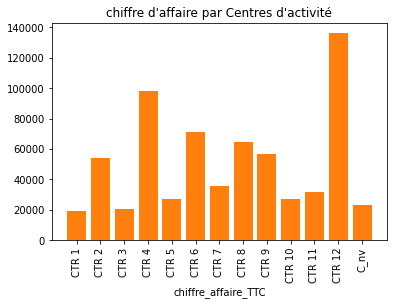

In [ ]:
plt.bar(vente["Centres_Activite"], vente["chiffre_affaire_TTC"], color= 'C1')
plt.xlabel("Centres_Activite")
plt.xlabel("chiffre_affaire_TTC")
plt.title("chiffre d'affaire par Centres d'activité")
plt.xticks(rotation= "vertical")
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

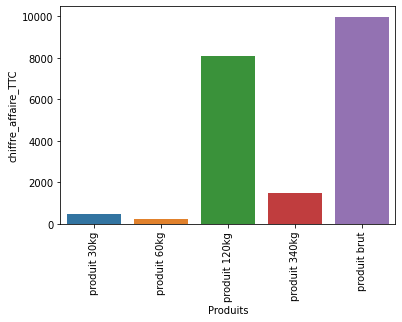

In [ ]:
# sns.barplot(x = vente['Produits'], y= vente['chiffre_affaire_TTC'])

sns.barplot(x = 'Produits', y= 'chiffre_affaire_TTC' , data =vente, ci= None)
plt.xticks(rotation= "vertical")

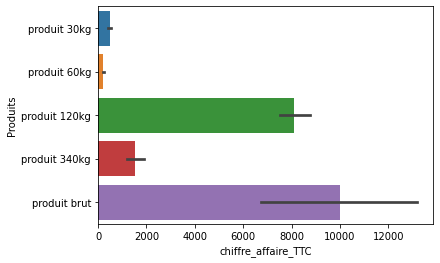

In [ ]:
sns.barplot(x = 'chiffre_affaire_TTC', y= 'Produits' , data =vente)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

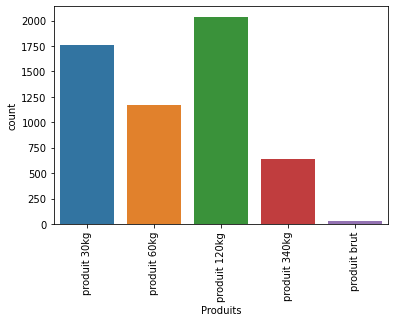

In [ ]:
sns.countplot(x = 'Produits', data = vente)
plt.xticks(rotation= "vertical")

In [ ]:
vente.groupby('mois')['chiffre_affaire_TTC'].sum()


mois
April        1.618485e+06
August       1.504332e+06
December     1.625452e+06
February     1.848906e+06
January      1.608477e+06
July         1.705460e+06
June         1.503682e+06
March        1.538362e+06
May          1.635671e+06
November     1.469577e+06
October      1.447096e+06
September    1.335234e+06
Name: chiffre_affaire_TTC, dtype: float64

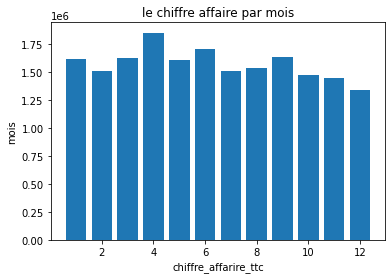

In [ ]:
mois = range(1,13)
plt.bar(mois,vente.groupby('mois')['chiffre_affaire_TTC'].sum())
plt.xlabel("chiffre_affarire_ttc")
plt.ylabel('mois')
plt.title('le chiffre affaire par mois')
plt.show()

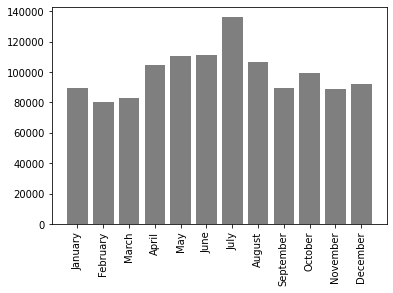

In [ ]:
# vente["mois"].unique()
CA_mois = plt.bar(vente["mois"], vente["chiffre_affaire_TTC"], color="C7")
plt.xticks(rotation= "vertical")
plt.show()

<BarContainer object of 5624 artists>

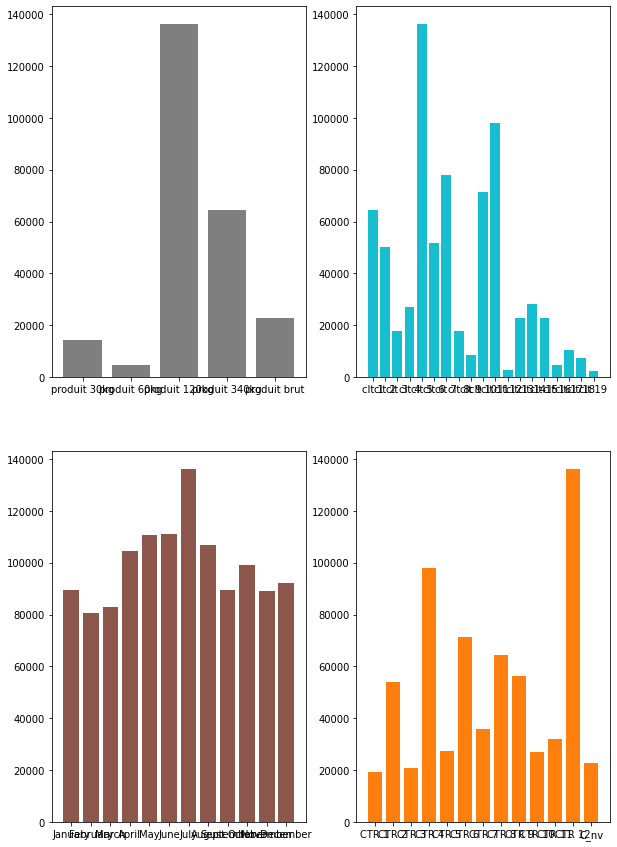

In [ ]:
# tableau de bord 

fig, axes = plt.subplots(2,2)
fig.set_size_inches(10,15)
axes[0,0].bar(vente["Produits"], vente["chiffre_affaire_TTC"], color='C7')
axes[0,1].bar(vente["Clients"], vente["chiffre_affaire_TTC"], color='C9')
axes[1,0].bar(vente["mois"], vente["chiffre_affaire_TTC"], color='C5')
axes[1,1].bar(vente["Centres_Activite"], vente["chiffre_affaire_TTC"], color='C1')

recommandations:

nous constatons que la sociéte réalise a chiffre d'afaire important.
le client 12 est le plus important que nous proposons de lui octroyé une remise
nous constatons aussi que le centre d'activité n 12 est le plus important ainsi que le centre 1 et 3 qu'ils nécessitent des actions marketing courageuse.
le mois de juillet constitue la haute saison 